# MLT 19/05/2020

## Discussion on Classification Methods
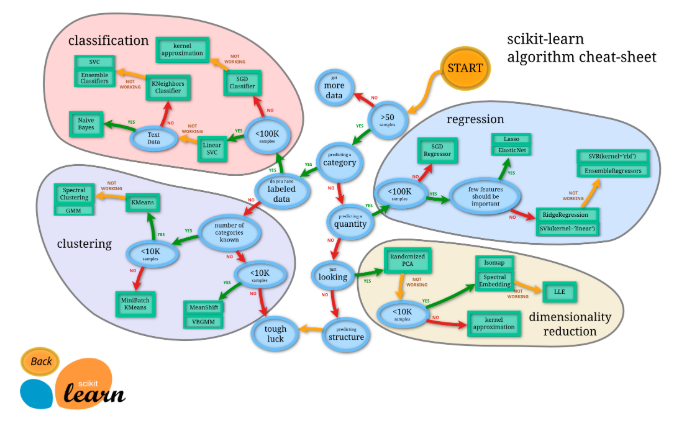

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification





In [2]:
from sklearn.neighbors import KNeighborsClassifier

### KNN Algo

1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
4. Calculate the distance between the query example and the current example from the data.
5. Add the distance and the index of the example to an ordered collection
6. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
7. Pick the first K entries from the sorted collection
8. Get the labels of the selected K entries
9. If regression, return the mean of the K labels
10. If classification, return the mode of the K labels

In [3]:
from sklearn.neural_network import MLPClassifier

### MLPClassifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

In [4]:
from sklearn.svm import SVC

### SVM

As we know, in Support Vector Machine we try to find a hyperplane seperating classes by looking for 2 things:
Setting a larger margin
lowering misclassification rate(how much a model misqualifies a data)

Paramerter C:

Large Value of parameter C => small margin
Small Value of paramerter C => Large margin

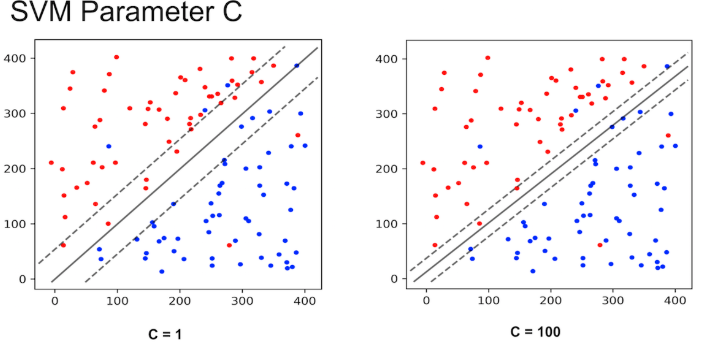


### RBF ( Radial Basis Function) kernel SVM

RBF SVM Classifiers are similar to base SVMs with the difference that an additional factor Gamma is introduced, affecting how 'far reaching' the affect of each training set is. Remember, with a high Gamma limiting reach and lower gamma expanding reach:


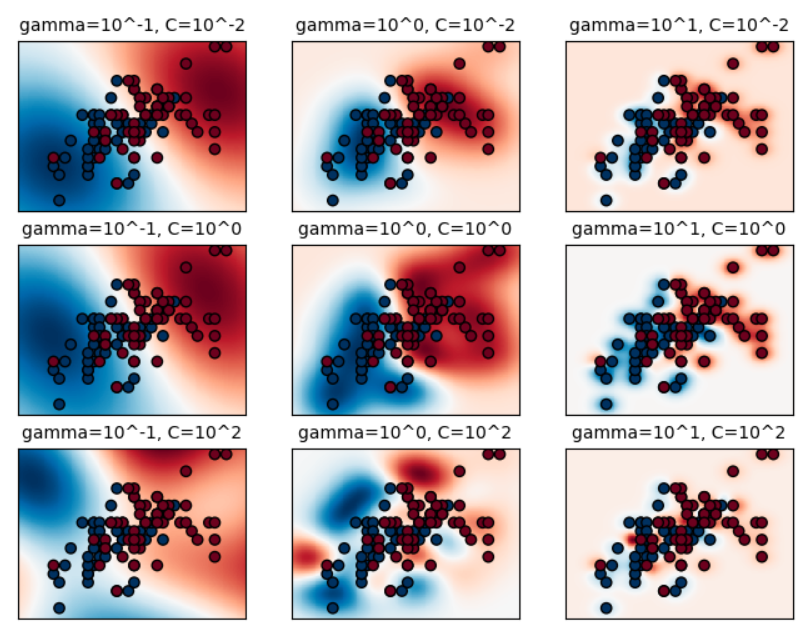

In [5]:
from sklearn.tree import DecisionTreeClassifier

### Decision Tree Classifiers

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. (covered Last session) 

In [6]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

### GPC (Laplace Implementation, distribution based classification)
a good example and explanation on this is available at:
https://towardsdatascience.com/an-intuitive-guide-to-gaussian-processes-ec2f0b45c71d
http://www.psych.mcgill.ca/labs/mogillab/anaconda2/lib/python2.7/site-packages/sklearn/gaussian_process/gpc.py
Bayesian inference might be an intimidating phrase but it boils down to just a method for updating our beliefs about the world based on evidence that we observe. In Bayesian inference our beliefs about the world are typically represented as probability distributions and Bayes’ rule tells us how to update these probability distributions.

"A Gaussian process is a probability distribution over possible functions."
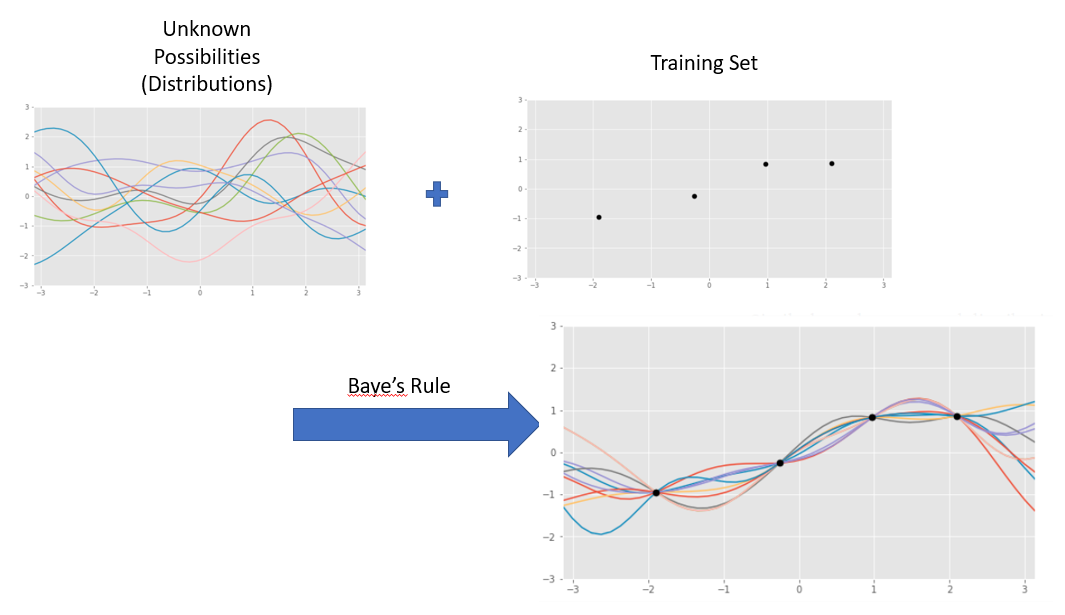

### Naive Bayes Classifier

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. A quick cheat sheet:

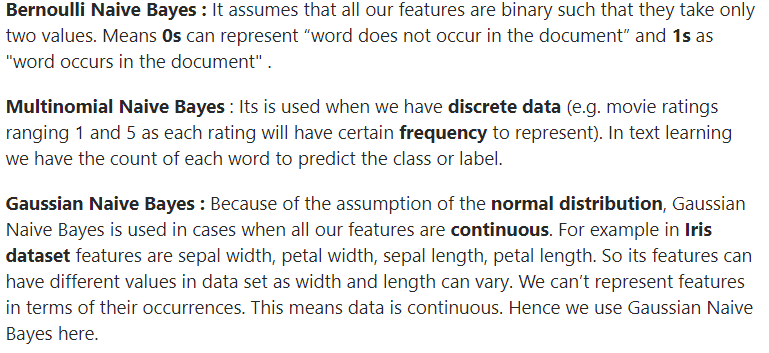

In [7]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

### AdaBoost Classifier 
Adaboost and Gradient boosting are both algorithms that focus on fixing sample wieghts based on classification errors - example is a decision tree where the misclassified samples are identified at given a higher weight. To Quote:

"Samples which the previous stump incorrectly classified should be associated with larger sample weights and the ones it classified correctly should be associated with smaller sample weights"

The intuition described above can be described as such :
Train the model h1 on the whole set
Train the model h2 with exaggerated data on the regions in which h1 performs poorly
Train the model h3 with exaggerated data on the regions in which h1 ≠ h2
…

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### Quandratic Discriminant Analysis 

Discriminant analysis encompasses methods that can be used for both classification and dimensionality reduction. Linear discriminant analysis (LDA) is particularly popular because it is both a classifier and a dimensionality reduction technique. Quadratic discriminant analysis (QDA) is a variant of LDA that allows for non-linear separation of data. Finally, regularized discriminant analysis (RDA) is a compromise between LDA and QDA.

In [9]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [10]:
#Create Random Data Set for Classiffication study

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [11]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

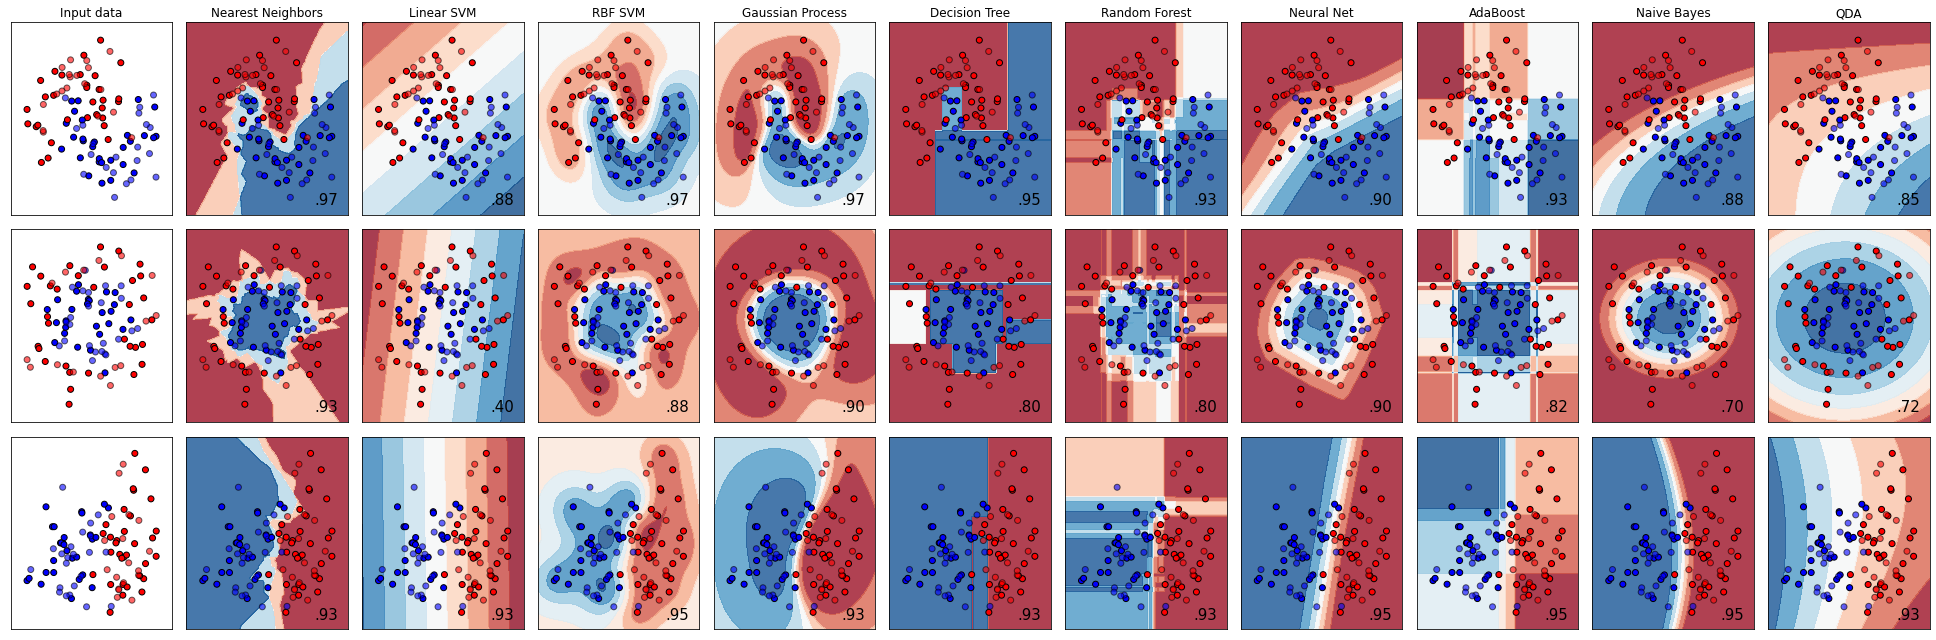

In [12]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    ##plot variables

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


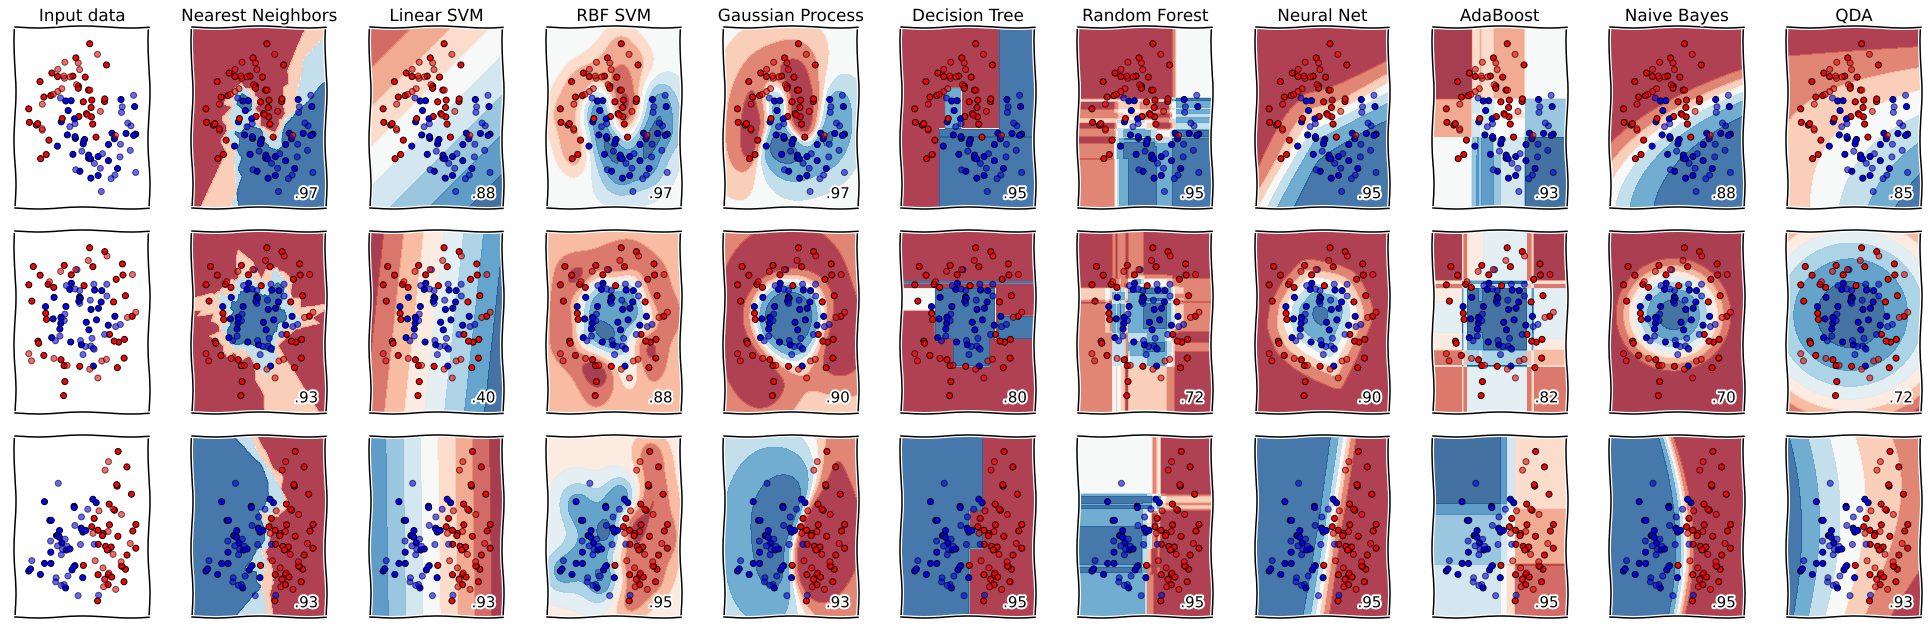

In [13]:
plt.xkcd() #chuckles

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    ##plot variables

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


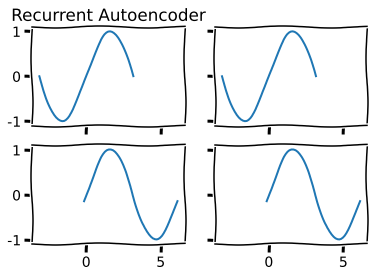

In [14]:
plt.xkcd()

x1 = np.linspace(-np.pi, np.pi)
y1 = np.sin(x1)
phi = 3
x2 = np.linspace(-np.pi+phi, np.pi+phi)
y2 = np.sin(x2)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
ax1.plot(x1, y1)
ax1.set_title('Recurrent Autoencoder')
ax2.plot(x1, y1)
ax3.plot(x2, y2)
ax4.plot(x2, y2)
plt.show()